In [105]:
#Implement Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [128]:
df = pd.read_csv("diabetes_bronze.txt")

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
# Shape of DF
df.shape

(768, 9)

In [109]:
# Check for NULL Values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [110]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\saghogare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

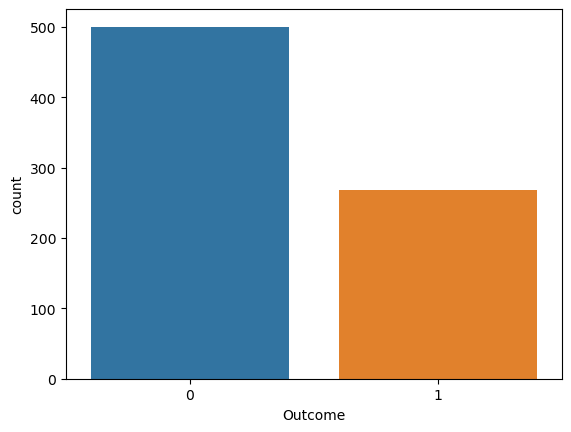

In [112]:
sns.countplot(df['Outcome'])  #As

C:\Users\saghogare\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

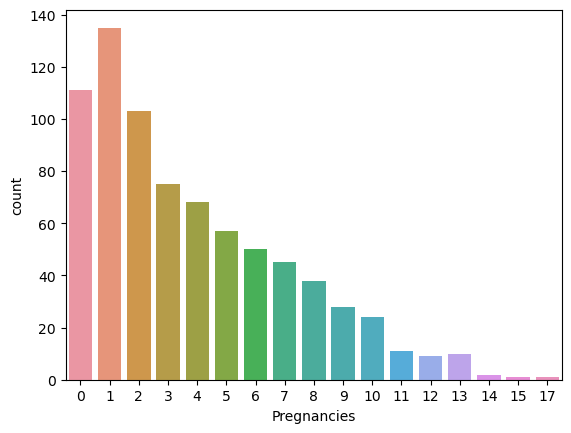

In [113]:
sns.countplot(df['Pregnancies']) 

IndexError: index 2 is out of bounds for axis 0 with size 2

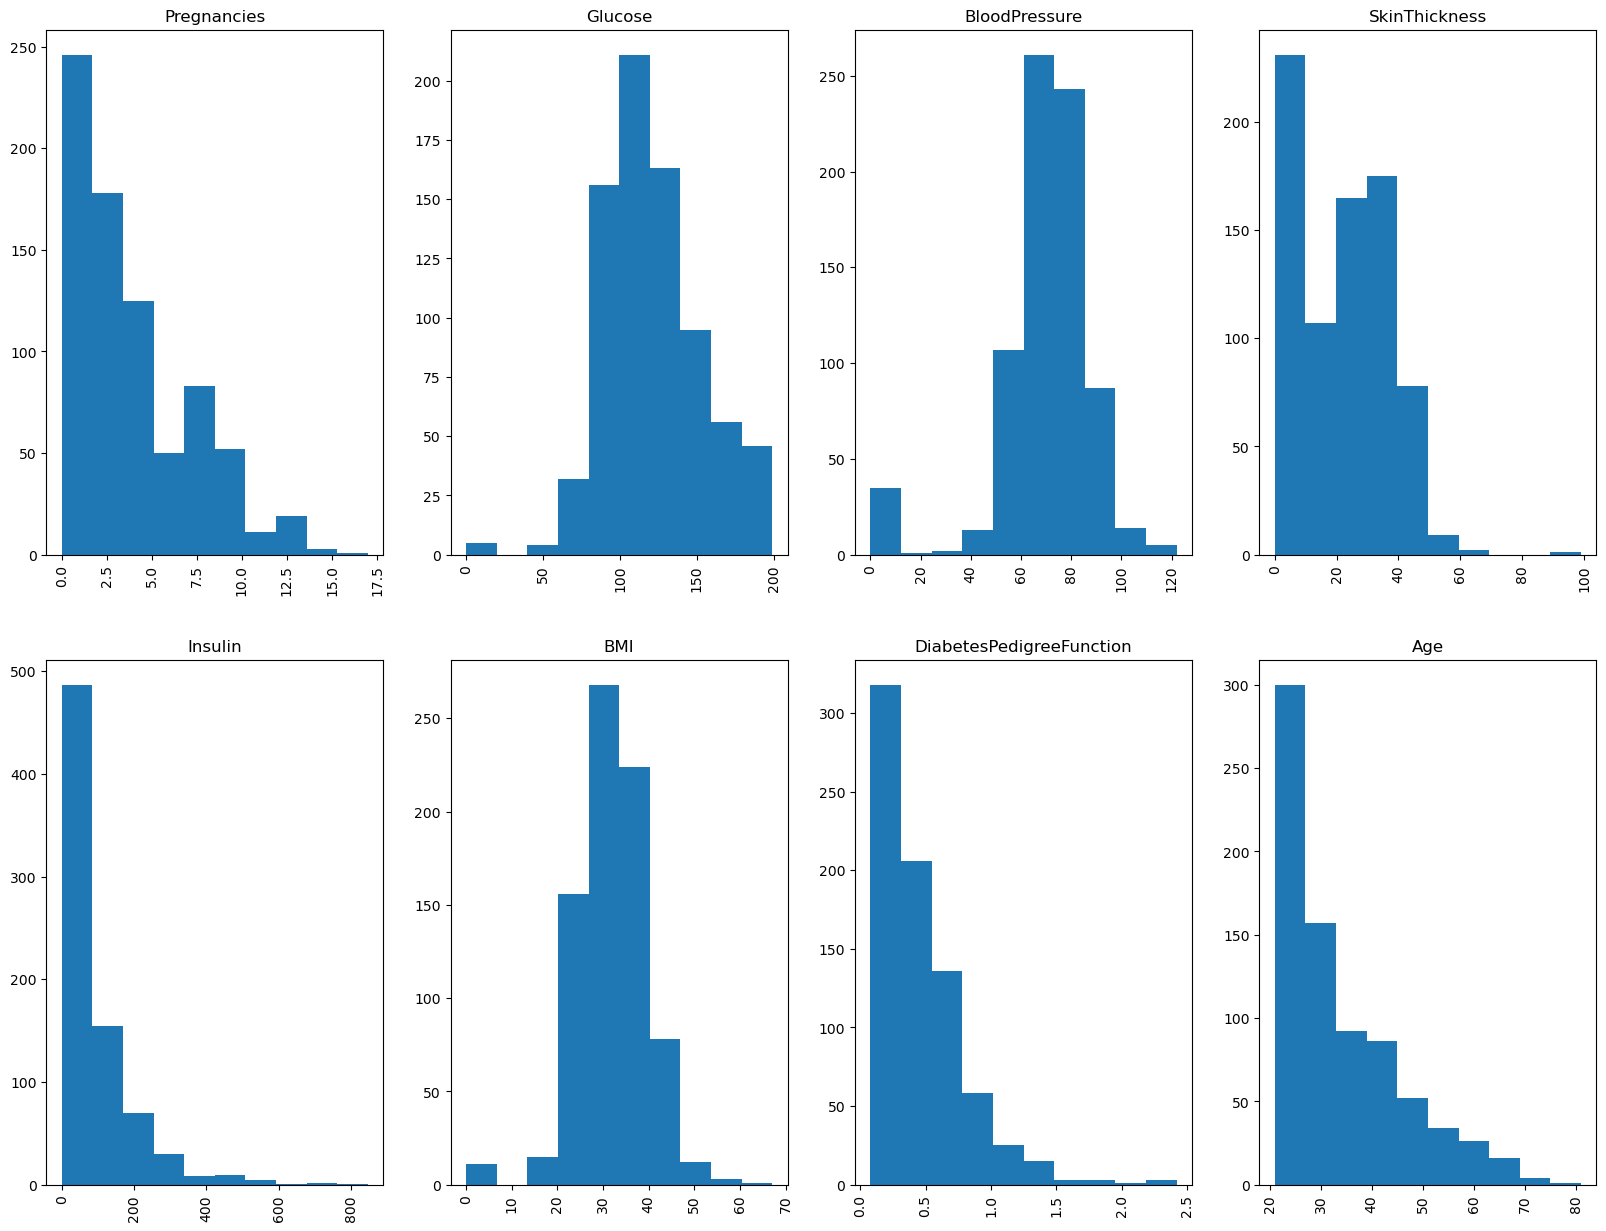

In [114]:
# Data Distribution and Visualization

fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize = (20,15))

counter = 0
for col in df.columns:
    trace_x = counter // 4
    trace_y = counter % 4
    
    axes[trace_x,trace_y].hist(df[col])
    axes[trace_x,trace_y].set_title(col)
    
    for tick in axes[trace_x, trace_y].get_xticklabels() :
        tick.set_rotation(90)
        
        
    counter = counter + 1
    
plt.show()

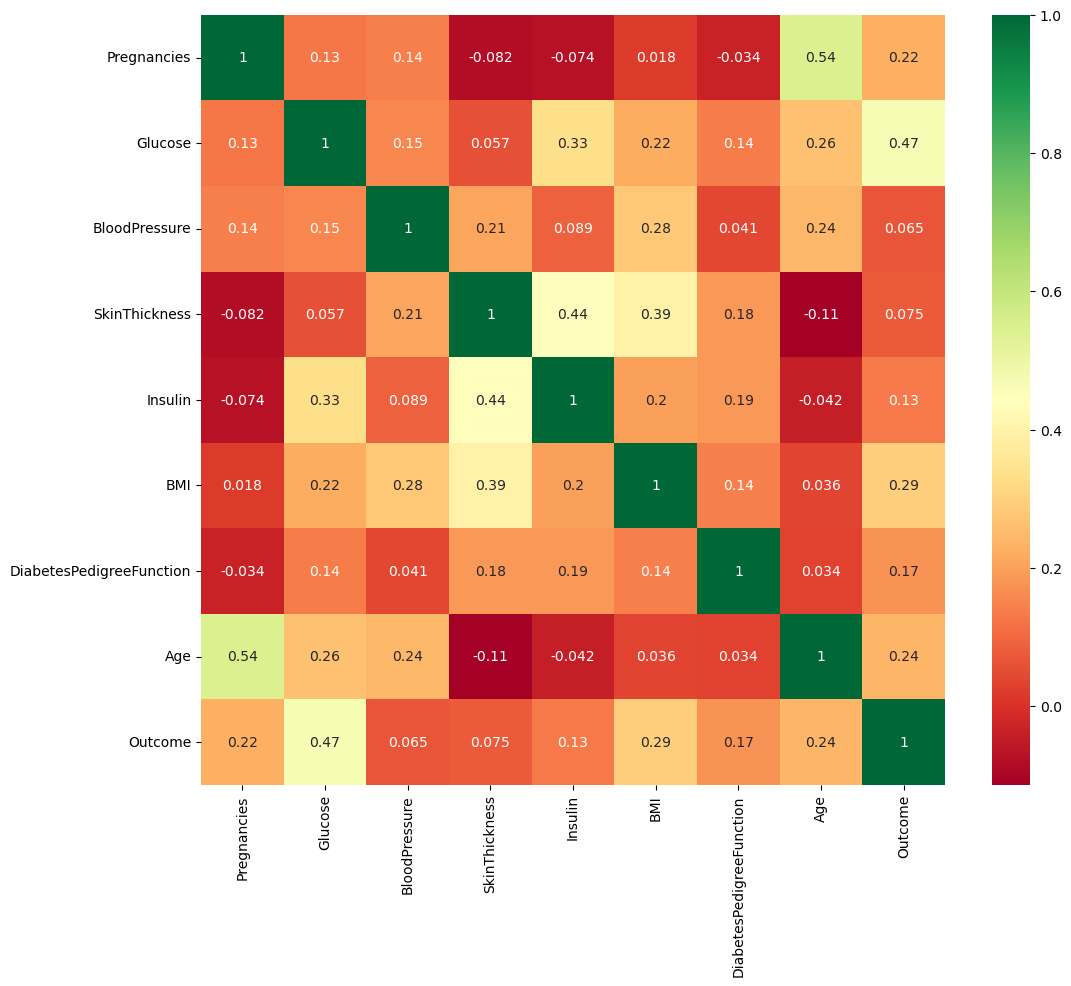

In [115]:
# Correlation between all features

plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [116]:
## Null Handling

newdf = df.copy()


newdf['SkinThickness'] = newdf['SkinThickness'].replace('0',newdf['SkinThickness'].mean())
newdf['BMI'] = newdf['BMI'].replace(0,newdf['BMI'].mean())
newdf['BloodPressure'] = newdf['BloodPressure'].replace(0,newdf['BloodPressure'].mean())
newdf['Glucose'] = newdf['Glucose'].replace(0,newdf['Glucose'].mean())


In [130]:
newdf.to_csv('diabetes_silver.csv', index=False)

In [117]:
# Scaling Down
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(newdf.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.907270,-0.692891,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.530902,-0.692891,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-1.288212,-0.692891,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,0.154533,0.123302,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.907270,0.765836,1.549899,5.484909,-0.020496


In [131]:
newdf.to_csv('diabetes_gold.csv', index=False)

In [132]:
# Applying ML Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(newdf.drop('Outcome', axis=1),newdf['Outcome'],test_size=0.2, random_state=45)

In [119]:
print(xtrain.shape)
print(ytrain.shape)

(614, 8)
(614,)


In [120]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain,ytrain)

SVC()

In [121]:
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

In [122]:
from sklearn.metrics import accuracy_score

print("Accuray Score for Training set = ", accuracy_score(ytrain,ytrain_pred))
print("Accuray Score for Testing set = ", accuracy_score(ytest,ytest_pred))

Accuray Score for Training set =  0.7687296416938111
Accuray Score for Testing set =  0.7402597402597403
